<a href="https://colab.research.google.com/github/avats101/Spotilyser/blob/arohan-mishra-patch-1/spotilyserMood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

In [ ]:
from tkinter import *
from tkinter import filedialog
import pandas as pd

def get_directory():
    root = Tk()
    path = filedialog.askdirectory(title="Choose path to spotify data folder")
    root.destroy()
    return path

def createDF():
    path = get_directory()+"/"
    # df1 = pd.read_json(path+"/StreamingHistory0.json", encoding='utf-8')
    # df2 = pd.read_json(path+"/StreamingHistory1.json", encoding='utf-8')
    # df3 = pd.read_json(path+"/StreamingHistory2.json", encoding='utf-8')
    # df4 = pd.read_json(path+"/StreamingHistory3.json", encoding='utf-8')
    df5 = pd.read_json(path+"/StreamingHistory4.json", encoding='utf-8')
    stream_df = pd.concat([df5], ignore_index=True)

    return stream_df

In [ ]:
def getAccessToken():
    auth_url = 'https://accounts.spotify.com/api/token'
    clientID = "204d99eaea4044d08a4d5c06444cb58a"
    clientSecret = "ac11837bbd6e410da35bcbd3a1b05a7c"

    data = {
        'grant_type': 'client_credentials',
        'client_id': clientID,
        'client_secret': clientSecret,
    }

    auth_response = requests.post(auth_url, data = data)
    access_token = auth_response.json().get('access_token')
    return access_token

In [ ]:
def getAudioID(name):
  endpoint = "https://api.spotify.com/v1/search?q=track:" + name + "&type=track"

  headers = {
        'Authorization': 'Bearer {}'.format(getAccessToken())
    }

  response = requests.get(endpoint, headers = headers)
  if len(response.json().get('tracks').get('items')) != 0 and response.json() is not None:
    return response.json().get('tracks').get('items')[0].get('id')
  else:
    return 'noIDfound'
  # print(response.json())

getAudioID("The Hills")

'7fBv7CLKzipRk6EC6TWHOB'

In [ ]:
def getAudioFeatures(id):
  endpoint = "https://api.spotify.com/v1/audio-features/" + id

  headers = {
        'Authorization': 'Bearer {}'.format(getAccessToken())
    }

  response = requests.get(endpoint, headers = headers)

  return response.json()

getAudioFeatures('7fBv7CLKzipRk6EC6TWHOB')

{'acousticness': 0.0671,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7fBv7CLKzipRk6EC6TWHOB',
 'danceability': 0.585,
 'duration_ms': 242253,
 'energy': 0.564,
 'id': '7fBv7CLKzipRk6EC6TWHOB',
 'instrumentalness': 0,
 'key': 0,
 'liveness': 0.135,
 'loudness': -7.063,
 'mode': 0,
 'speechiness': 0.0515,
 'tempo': 113.003,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/7fBv7CLKzipRk6EC6TWHOB',
 'type': 'audio_features',
 'uri': 'spotify:track:7fBv7CLKzipRk6EC6TWHOB',
 'valence': 0.137}

In [ ]:
# df1 = pd.read_json("StreamingHistory0.json", encoding='utf-8')
# df2 = pd.read_json("StreamingHistory1.json", encoding='utf-8')
# df3 = pd.read_json("StreamingHistory2.json", encoding='utf-8')
# df4 = pd.read_json("StreamingHistory3.json", encoding='utf-8')
df5 = pd.read_json("StreamingHistory4.json", encoding='utf-8')
df = pd.concat([df5], ignore_index=True)
df.head()

,endTime,artistName,trackName,msPlayed
0,2022-02-08 19:42,The Weeknd,The Morning,312426
1,2022-02-08 19:45,The Weeknd,Sacrifice,188918
2,2022-02-08 19:50,The Weeknd,Faith,283226
3,2022-02-08 19:55,The Weeknd,Wicked Games,323746
4,2022-02-08 20:00,Lana Del Rey,Lust For Life (with The Weeknd),264066


In [ ]:
tracks = df['trackName'].tolist()
ids = list(map(getAudioID, tracks[0:500]))
print(ids)

['4OkiWfrZKmmVoILXk8JEtl', '1nH2PkJL1XoUq8oE6tBZoU', '57ebBLITHpRgRKGrlbxMZS', '6VwBbL8CzPiC4QV66ay7oR', '0mt02gJ425Xjm7c3jYkOBn', '5J4ZkQpzMUFojo1CtAZYpn', '4cbdPT6uaBOgOQe3fLMofl', '0VjIjW4GlUZAMYd2vXMi3b', '4EWCNWgDS8707fNSZ1oaA5', '2TZu0eg6gBNwbqPyzSDqnf', '5QO79kh1waicV47BqGRL3g', '4frLb7nWtsz2ymBE6k2GRP', '0VO8gYVDSwM1Qdd2GsMoYK', '6O6HjqHUhDvh2a1T5NXNRJ', 'noIDfound', 'noIDfound', 'noIDfound', '6Yj7Zhxt73uvwFFvzQXdxO', '0GhMz8BlZHg07NZMOOcljC', '3fYO6sRqHy1BdF8EiLGyop', '3HWzoMvoF3TQfYg4UPszDq', '3ELehnkmzHQpkjEXgc1uC9', '0L1aUXwaUwRTHqDvxOLAK3', '1tGKUytNIsxKQ6upkD7FIj', '1dZCiUTIbbvwOCALmzBh9y', '1PckUlxKqWQs3RlWXVBLw3', '62pu3ajjWlZPexvtz1Mxyn', '38ttuCHHJeQcWc1gM0OKUj', 'noIDfound', 'noIDfound', '22xea6Z2a8BbyVeCksSBX9', '6rjHq9THY9WoxTuyeGJ02A', '5Xurk4FBpGtgddhbCmylg6', '02VBYrHfVwfEWXk5DXyf0T', '7FFvU6Jr6sRdbP36UFBwim', '4xuGvvddb7hj5N9SZys971', 'noIDfound', '5bhVXcAkmihE4YvKdGimxL', '3KkXRkHbMCARz0aVfEt68P', '62pu3ajjWlZPexvtz1Mxyn', '7hlYfQpGJWdheP2quiyz8j', '1dZCiUTIbb

In [ ]:
audioFeatures = list(map(getAudioFeatures, ids))
print(audioFeatures)

[{'danceability': 0.44, 'energy': 0.671, 'key': 3, 'loudness': -10.598, 'mode': 0, 'speechiness': 0.477, 'acousticness': 0.764, 'instrumentalness': 0, 'liveness': 0.212, 'valence': 0.479, 'tempo': 83.078, 'type': 'audio_features', 'id': '4OkiWfrZKmmVoILXk8JEtl', 'uri': 'spotify:track:4OkiWfrZKmmVoILXk8JEtl', 'track_href': 'https://api.spotify.com/v1/tracks/4OkiWfrZKmmVoILXk8JEtl', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4OkiWfrZKmmVoILXk8JEtl', 'duration_ms': 234387, 'time_signature': 4}, {'danceability': 0.735, 'energy': 0.795, 'key': 11, 'loudness': -6.523, 'mode': 0, 'speechiness': 0.113, 'acousticness': 0.0296, 'instrumentalness': 3.18e-05, 'liveness': 0.0678, 'valence': 0.905, 'tempo': 122.0, 'type': 'audio_features', 'id': '1nH2PkJL1XoUq8oE6tBZoU', 'uri': 'spotify:track:1nH2PkJL1XoUq8oE6tBZoU', 'track_href': 'https://api.spotify.com/v1/tracks/1nH2PkJL1XoUq8oE6tBZoU', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1nH2PkJL1XoUq8oE6tBZoU', 'duration_m

In [ ]:
acousticness = []
danceability = []
liveness = []
loudness = []
speechiness = []
valence = []

for i in audioFeatures:
  acousticness.append(i.get('acousticness'))
  danceability.append(i.get('danceability'))
  liveness.append(i.get('liveness'))
  loudness.append(i.get('loudness'))
  speechiness.append(i.get('speechiness'))
  valence.append(i.get('valence'))

songs = pd.DataFrame(list(zip(tracks, acousticness, danceability, liveness, loudness, speechiness, valence)), columns=['Song', 'Acousticness', 'Danceability', 'Liveness', 'Loudness', 'Speechiness', 'Valence'])
songs.head()

,Song,Acousticness,Danceability,Liveness,Loudness,Speechiness,Valence
0,The Morning,0.76400,0.440,0.2120,-10.598,0.4770,0.479
1,Sacrifice,0.02960,0.735,0.0678,-6.523,0.1130,0.905
2,Faith,0.09790,0.202,0.1090,-5.212,0.0324,0.252
3,Wicked Games,0.00959,0.658,0.3250,-5.197,0.0309,0.326
4,Lust For Life (with The Weeknd),0.60400,0.504,0.3640,-8.644,0.0542,0.262


In [ ]:
from sklearn import preprocessing
import numpy

arr = numpy.array(loudness)
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(arr.reshape(-1,1))

songs['Loudness'] = pd.DataFrame(loudness_scaled)
songs.dropna(inplace=True)
songs.head()

,Song,Acousticness,Danceability,Liveness,Loudness,Speechiness,Valence
0,The Morning,0.76400,0.440,0.2120,0.700505,0.4770,0.479
1,Sacrifice,0.02960,0.735,0.0678,0.821569,0.1130,0.905
2,Faith,0.09790,0.202,0.1090,0.860517,0.0324,0.252
3,Wicked Games,0.00959,0.658,0.3250,0.860963,0.0309,0.326
4,Lust For Life (with The Weeknd),0.60400,0.504,0.3640,0.758556,0.0542,0.262


In [ ]:
song_features = songs.drop('Song',axis=1)
song_features.head()

,Acousticness,Danceability,Liveness,Loudness,Speechiness,Valence
0,0.76400,0.440,0.2120,0.700505,0.4770,0.479
1,0.02960,0.735,0.0678,0.821569,0.1130,0.905
2,0.09790,0.202,0.1090,0.860517,0.0324,0.252
3,0.00959,0.658,0.3250,0.860963,0.0309,0.326
4,0.60400,0.504,0.3640,0.758556,0.0542,0.262


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc10ef6de50>,
      dtype=object)

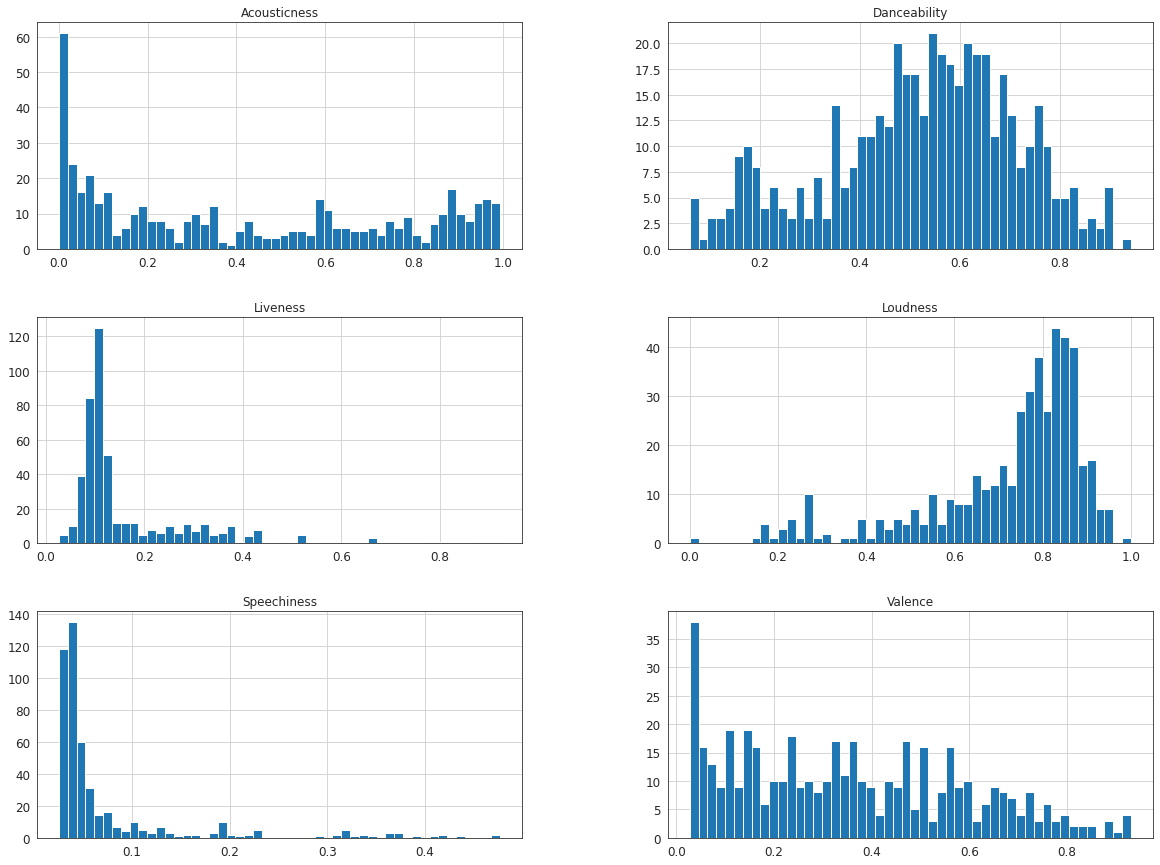

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

song_features.hist(bins=50,figsize=(20,15))

In [ ]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(song_features)
    Sum_of_squared_distances.append(km.inertia_)

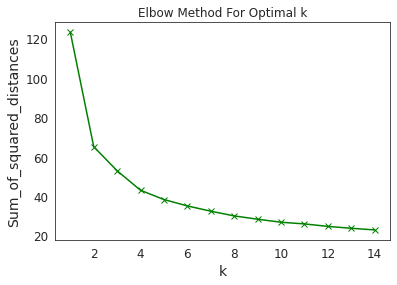

In [ ]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(song_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (song_features, preds, metric='euclidean')

plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(song_features)

KMeans(n_clusters=3)

In [ ]:
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(song_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(song_features)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


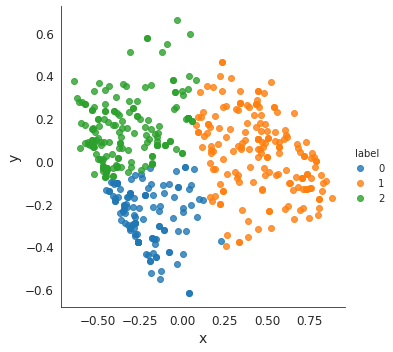

In [ ]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [ ]:
pca.explained_variance_ratio_

array([0.60662808, 0.19137759])

In [ ]:
print(pd.DataFrame(pca.components_,columns=song_features.columns,index = ['PC-1','PC-2']))

      Acousticness  Danceability  Liveness  Loudness  Speechiness   Valence
PC-1      0.798874      -0.28861 -0.080298 -0.342934    -0.057617 -0.388757
PC-2      0.543595       0.47992  0.020369  0.075894     0.048979  0.682354


In [ ]:
songs['label'] = y_kmeans

# shuffle dataset
songs = songs.sample(frac=1)
songs['label'].value_counts()

1    175
2    168
0    123
Name: label, dtype: int64

In [ ]:
songs[songs['label'] == 0].head(20)

,Song,Acousticness,Danceability,Liveness,Loudness,Speechiness,Valence,label
178,Let's Hurt Tonight,0.330000,0.359,0.3240,0.880897,0.0366,0.2720,0
177,Shots,0.084000,0.712,0.5270,0.801040,0.0531,0.2200,0
253,I Tried,0.010400,0.727,0.1070,0.832888,0.0742,0.3780,0
165,Boku no Sensou,0.009160,0.473,0.3100,0.870469,0.0704,0.4160,0
417,Scary Love,0.000095,0.595,0.1960,0.837671,0.0312,0.1470,0
212,House Of Balloons / Glass Table Girls,0.012300,0.650,0.3010,0.854427,0.0377,0.3190,0
100,Ek Tu Hi Toh Hai,0.346000,0.360,0.0930,0.826233,0.0381,0.3360,0
367,Hold Me While You Wait,0.443000,0.688,0.0995,0.851753,0.0333,0.1620,0
300,Scars To Your Beautiful,0.028500,0.573,0.1110,0.844831,0.1290,0.4510,0
387,Love Is A Game,0.453000,0.269,0.0702,0.843345,0.0416,0.2280,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc10ed34650>,
      dtype=object)

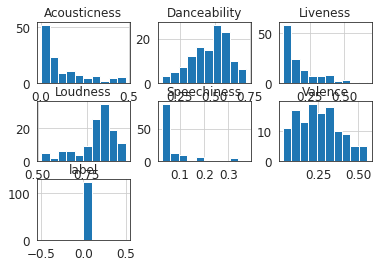

In [ ]:
songs[songs['label']==0].hist()

In [ ]:
songs[songs['label']==0].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Acousticness    0.115269
Danceability    0.467821
Liveness        0.176209
Loudness        0.802110
Speechiness     0.070372
Valence         0.253292
label           0.000000
dtype: float64

In [ ]:
songs[songs['label'] == 1].head(20)

,Song,Acousticness,Danceability,Liveness,Loudness,Speechiness,Valence,label
242,Volksgarten Vibes,0.787,0.6290,0.1300,0.421895,0.0744,0.1720,1
416,I Can't Make You Love Me,0.846,0.5880,0.2360,0.518390,0.0319,0.1130,1
228,Viertel 4 am Schwedenplatz,0.758,0.5620,0.1010,0.464260,0.0297,0.0383,1
56,Mr. Longbottom Flies,0.880,0.1590,0.1130,0.364617,0.0367,0.0939,1
135,The Mandalorian - Orchestral Version,0.832,0.4770,0.2880,0.639453,0.0391,0.1170,1
364,Love is Pain,0.927,0.6090,0.0923,0.559923,0.0394,0.1070,1
280,Anchor,0.805,0.4570,0.1260,0.674450,0.0308,0.1260,1
40,Princess Leia's Theme,0.857,0.0784,0.0712,0.451337,0.0425,0.0308,1
415,I Will Spend My Whole Life Loving You,0.887,0.6370,0.0719,0.507873,0.0346,0.2980,1
372,Love Is Gone - Acoustic,0.882,0.5410,0.1600,0.698841,0.0303,0.3590,1


In [ ]:
songs[songs['label'] == 2].head(20)

,Song,Acousticness,Danceability,Liveness,Loudness,Speechiness,Valence,label
289,Khudi,0.0196,0.626,0.1060,0.822193,0.0397,0.539,2
80,Tum Tak,0.6760,0.720,0.0679,0.725015,0.0491,0.566,2
398,The Love Club,0.2110,0.799,0.1180,0.800149,0.0465,0.635,2
390,I'm in Love Without You,0.0283,0.818,0.0709,0.766191,0.0563,0.651,2
199,Lose Somebody,0.3440,0.580,0.0755,0.810873,0.0357,0.507,2
494,彩霞,0.1540,0.642,0.2980,0.715805,0.1030,0.638,2
354,Stan - Live At 43rd Grammy Awards,0.2050,0.655,0.7030,0.849198,0.1400,0.642,2
375,Middle of the Mountain,0.5600,0.574,0.3230,0.761557,0.0292,0.670,2
459,I Am Falling in Love,0.2560,0.670,0.1120,0.778669,0.0300,0.358,2
310,Leaving Heaven (feat. Skylar Grey),0.1750,0.661,0.2540,0.872490,0.2060,0.509,2


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = song_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
definitions = ['Romantic','Sad','Energetic']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[43  0  0]
 [ 0 47  0]
 [ 1  2 61]]


In [ ]:
151/154

0.9805194805194806